In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency

In [50]:
df_stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
df_stroke.select_dtypes(include=np.number).describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# 1. Read the dataset and view the first 10 rows of it.



In [53]:
# Read the dataset
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display the first 10 rows of the DataFrame
print(df_stroke.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

# 2. Check the shape/dimension of the dataset

In [54]:
# Check the shape/dimension of the dataset
print(df_stroke.shape)


(5110, 12)


In [55]:
# Check for missing values and display the number of missing values per column
missing_values = df_stroke.isnull().sum()

# Display the result
print("Number of missing values per column:")
print(missing_values)


Number of missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# 3.Investigate and predict the missing BMI Value.

In [56]:
# Display the number of missing values in the 'bmi' column before filling
print("Number of missing values in 'bmi' column before filling:", df_stroke['bmi'].isnull().sum())

# Fill missing values in 'bmi' with the mean value
mean_bmi = df_stroke['bmi'].mean()
df_stroke['bmi'].fillna(mean_bmi, inplace=True)

# Display the number of missing values in 'bmi' column after filling
print("Number of missing values in 'bmi' column after filling:", df_stroke['bmi'].isnull().sum())

Number of missing values in 'bmi' column before filling: 201
Number of missing values in 'bmi' column after filling: 0


# 4.Check the datatype, number of non null values and name of each variable in the dataset.

In [57]:
# Display data types of each variable
print("Data Types:")
print(df_stroke.dtypes)

# Display number of non-null values for each variable
print("\nNumber of Non-Null Values:")
print(df_stroke.count())

# Display names of each variable (columns)
print("\nVariable Names:")
print(df_stroke.columns)


Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Number of Non-Null Values:
id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

Variable Names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


# 5.Check the descriptive statistics of the dataset.

In [58]:
# Display descriptive statistics of the dataset
print(df_stroke.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0

# 6.Visualize the proportion of Stroke samples in the dataset.

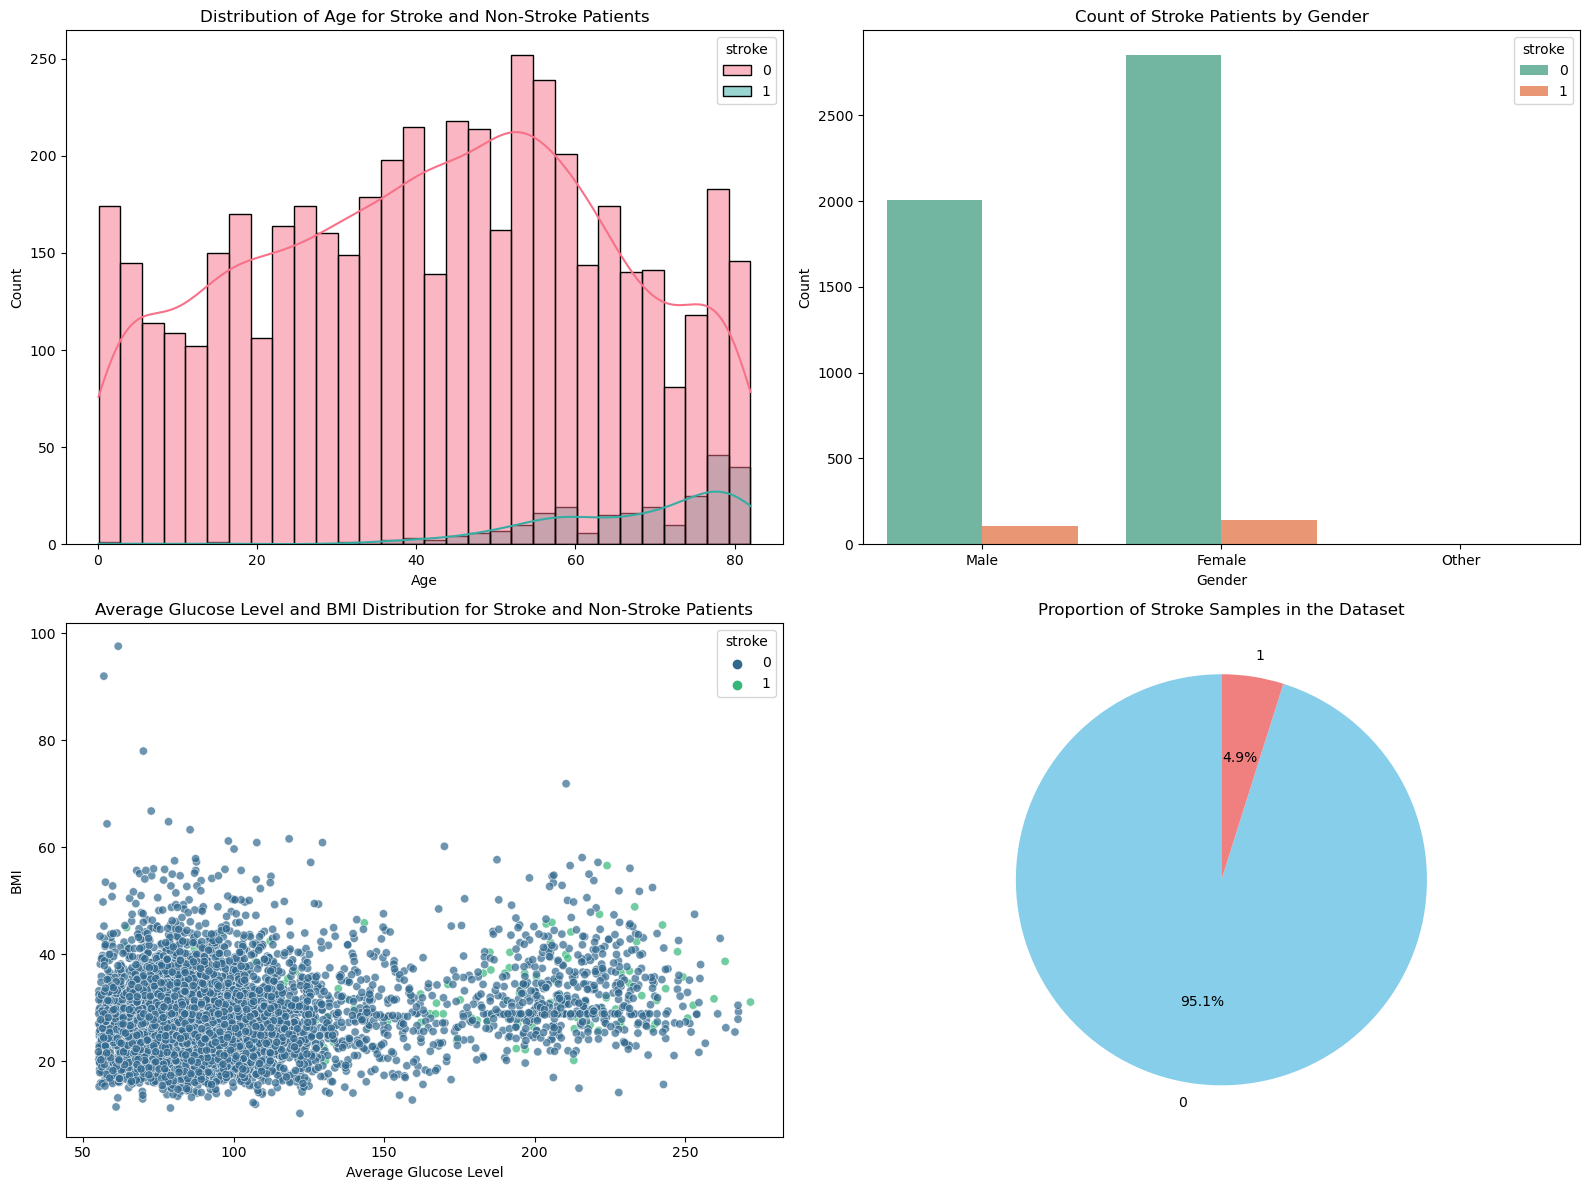

In [60]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Subplot 1: Distribution of Age for Stroke and Non-Stroke Patients
sns.histplot(data=df_stroke, x='age', hue='stroke', bins=30, kde=True, palette='husl', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age for Stroke and Non-Stroke Patients')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Subplot 2: Count of Stroke Patients by Gender
sns.countplot(data=df_stroke, x='gender', hue='stroke', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Count of Stroke Patients by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Subplot 3: Average Glucose Level and BMI Distribution for Stroke and Non-Stroke Patients
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='bmi', hue='stroke', palette='viridis', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Average Glucose Level and BMI Distribution for Stroke and Non-Stroke Patients')
axes[1, 0].set_xlabel('Average Glucose Level')
axes[1, 0].set_ylabel('BMI')

# Subplot 4: Proportion of Stroke Samples in the Dataset (Pie Chart)
stroke_counts = df_stroke['stroke'].value_counts()
axes[1, 1].pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[1, 1].set_title('Proportion of Stroke Samples in the Dataset')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 7.Visualize the Distribution of Male and Female Ages. Write the Observation. 10.Visualize the stroke sample based on a) BMI and Glucose Level b) BMI and Age

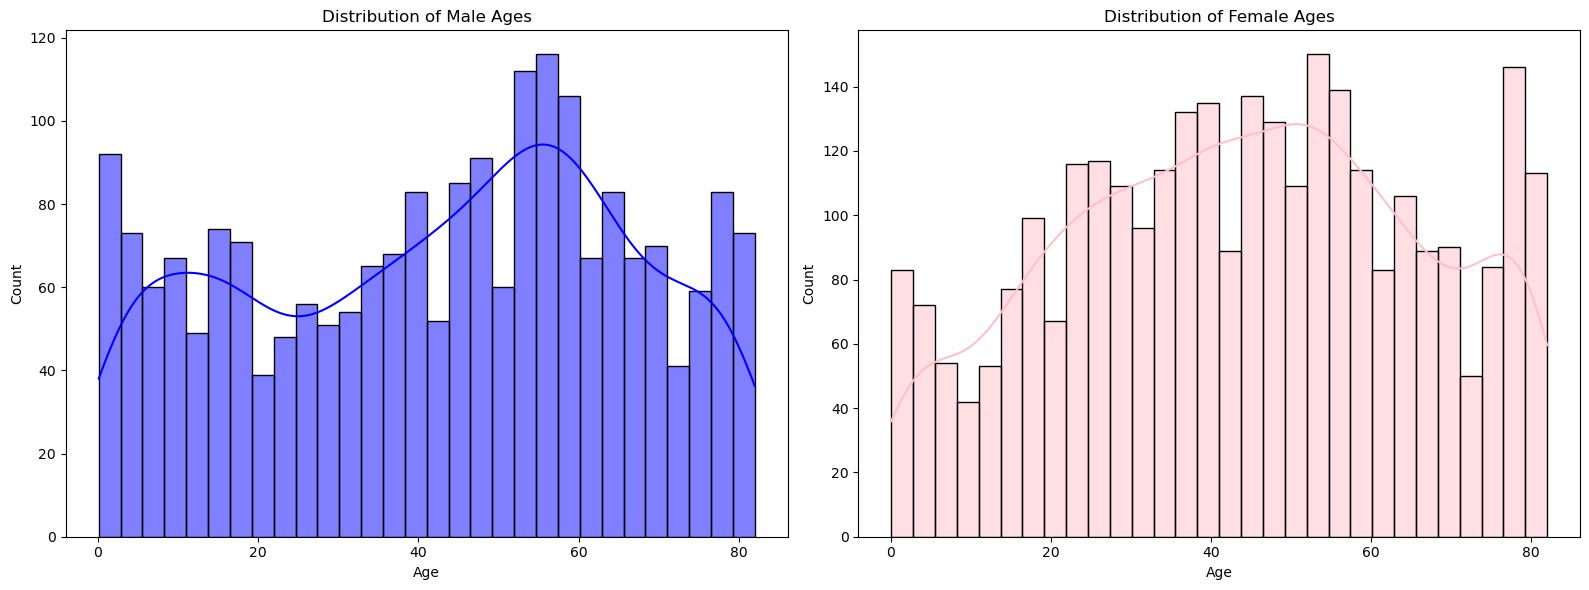

In [61]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot 1: Distribution of Male Ages
sns.histplot(data=df_stroke[df_stroke['gender'] == 'Male'], x='age', bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Male Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Subplot 2: Distribution of Female Ages
sns.histplot(data=df_stroke[df_stroke['gender'] == 'Female'], x='age', bins=30, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Distribution of Female Ages')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


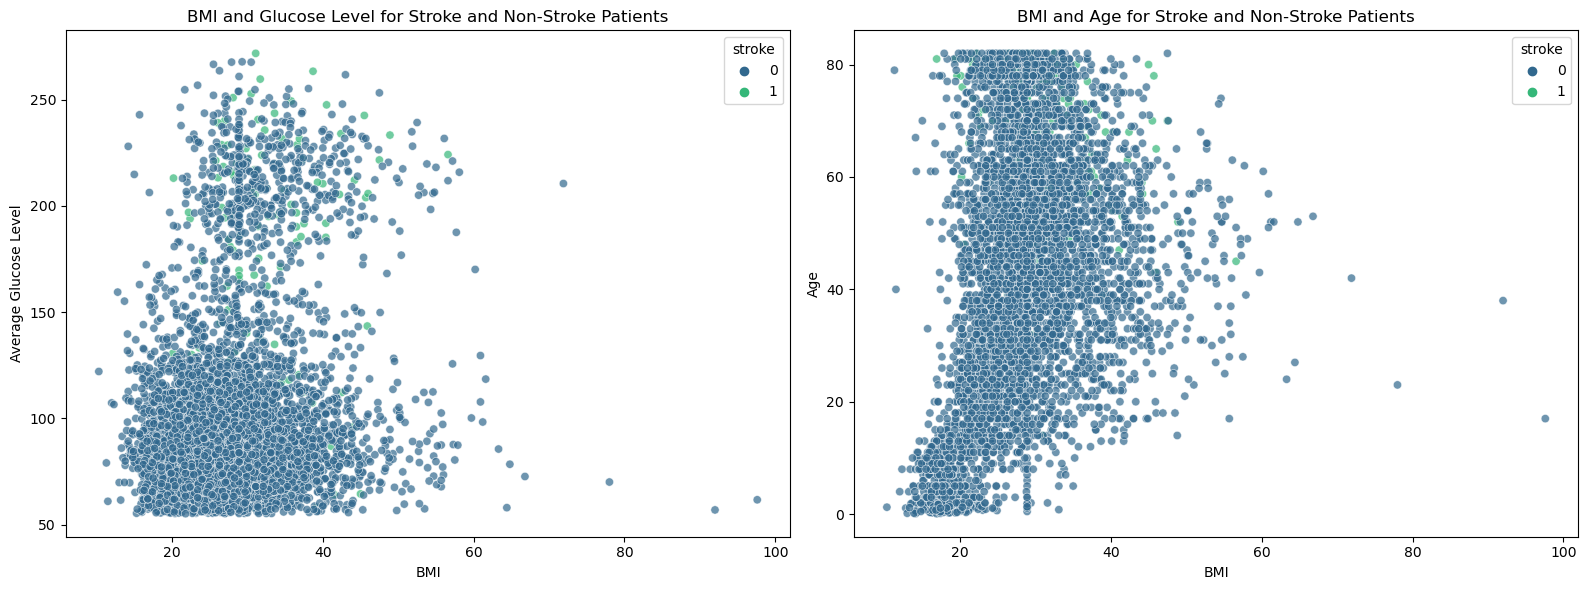

In [62]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot 1: BMI and Glucose Level for Stroke and Non-Stroke Patients
sns.scatterplot(data=df_stroke, x='bmi', y='avg_glucose_level', hue='stroke', palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('BMI and Glucose Level for Stroke and Non-Stroke Patients')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Average Glucose Level')

# Subplot 2: BMI and Age for Stroke and Non-Stroke Patients
sns.scatterplot(data=df_stroke, x='bmi', y='age', hue='stroke', palette='viridis', alpha=0.7, ax=axes[1])
axes[1].set_title('BMI and Age for Stroke and Non-Stroke Patients')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 8.Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

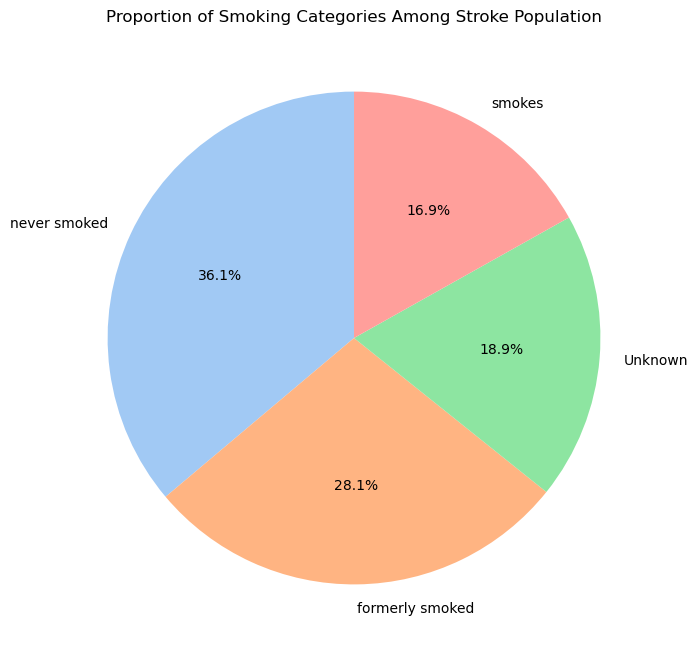

In [63]:
# Filter the dataset to include only stroke cases
df_stroke_cases = df_stroke[df_stroke['stroke'] == 1]

# Count the number of occurrences for each unique value in the 'smoking_status' column among stroke cases
smoking_counts = df_stroke_cases['smoking_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Smoking Categories Among Stroke Population')
plt.show()

# 9.Perform hypothesis testing to find the significant variables.

In [65]:
# Contingency table
contingency_table = pd.crosstab(df_stroke['smoking_status'], df_stroke['stroke'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared value: {chi2}')
print(f'p-value: {p}')

# Check significance (e.g., using a significance level of 0.05)
if p < 0.05:
    print("The 'smoking_status' variable is significantly associated with strokes.")
else:
    print("There is no significant association between 'smoking_status' and strokes.")


Chi-squared value: 29.147269191399264
p-value: 2.0853997025008455e-06
The 'smoking_status' variable is significantly associated with strokes.


# 10.Drop the unnecessary columns.

In [66]:
# Drop the 'id' column
df_stroke_cleaned = df_stroke.drop('id', axis=1)

# Display the first few rows of the cleaned DataFrame
print(df_stroke_cleaned.head())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1  
